original uncertainties matrix


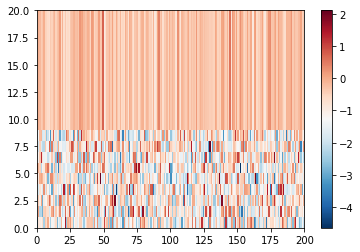

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.preprocessing import normalize

nbin = 10 # number of pt bins of original uncertainties
# randomly generate 200 original uncertainties each with 10 pt bins, -1 < uncertainty < 1
unc = np.random.normal(-1,1,(nbin,200)) 
#unc = np.array([[1./2, 1./3],
#                [1./3, 1./4]])
unc_norm = np.copy(unc)

nadded = 10

unc_new = np.r_[unc, np.outer(np.ones(nadded), unc[nbin-1])]
for i in range(len(unc_norm[-1])):
    unc_norm[-1][i] /= math.sqrt(nadded+1)
unc_norm = np.r_[unc_norm, np.outer(np.ones(nadded), unc_norm[-1])]

print("original uncertainties matrix")
plt.pcolormesh(unc_norm, cmap='RdBu_r')
plt.colorbar()
plt.show()

# EV decomposition on original covariance matrix
l, v = np.linalg.eigh(unc@unc.T)
l = np.maximum(l,0) # make eigenvalue >=0 for those eigenvalue < 0 because of numerical issue.
vl = v@np.diag(np.sqrt(l)) # eigenvector variation (eigenvector*sqrt(eigenvalue))

# EV decomposition on new covariance matrix after extension
l_norm, v_norm = np.linalg.eigh(unc_norm@unc_norm.T)
l_norm = np.maximum(l_norm,0)

# Use mask to scale back the last bins value by sqrt(nadded+1)
# The mask has the form of [1,1....1,sqrt(nadded+1),sqrt(nadded+1)....,sqrt(nadded+1)]
mask = np.array([1]*(unc.shape[0]-1)+[math.sqrt(nadded+1)]*(nadded+1))

# Multiply last pt bins value of eigenvectors by sqrt(nadded+1)
v_norm_restore = (v_norm.T@np.diag(mask)).T
# vl_norm is eigenvector variation (eigenvector*sqrt(eigenvalue))
vl_norm = v_norm_restore@np.diag(np.sqrt(l_norm))

# Use mask to flip the vl_norm sign to be the same as vl since the sign of eigenvector is random.
# sign_mask has value of either 1 or -1. vl need to be first padded to have same dimension as vl_norm
sign_mask = [np.sign(a*b) for a,b in zip([1]*nbin+vl[0].tolist(), vl_norm[0].tolist())]
vl_norm = vl_norm@np.diag(np.array(sign_mask))

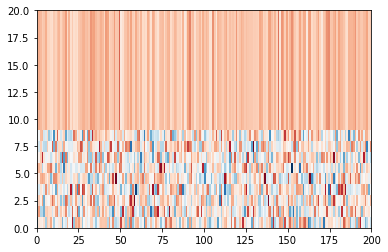

std cov matrix construct by original unc:


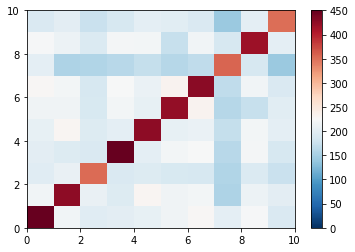

std cov matrix construct by eigenvectors and eigenvalues:


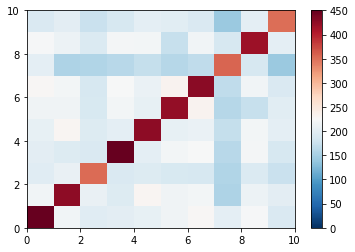

extended cov matrix by original unc after extension:


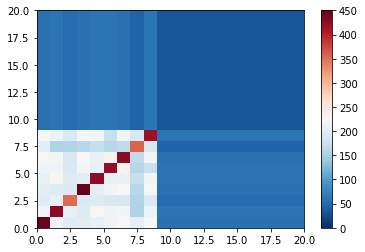

extended cov matrix by eigenvector after extension:


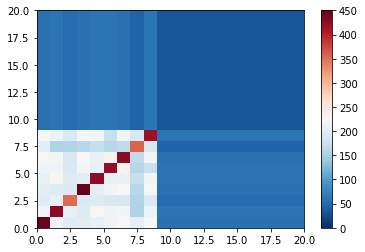

In [7]:
plt.pcolormesh(unc_norm, cmap='RdBu_r')
plt.show()

print("std cov matrix construct by original unc:")
plt.pcolormesh(unc@unc.T, cmap='RdBu_r',vmin=0, vmax=450)
plt.colorbar()
plt.show()

print("std cov matrix construct by eigenvectors and eigenvalues:")
plt.pcolormesh(v@np.diag(l)@v.T, cmap='RdBu_r',vmin=0, vmax=450)
plt.colorbar()
plt.show()

print("extended cov matrix by original unc after extension:")
plt.pcolormesh(unc_norm@unc_norm.T, cmap='RdBu_r',vmin=0, vmax=450)
plt.colorbar()
plt.show()

print("extended cov matrix by eigenvector after extension:")
plt.pcolormesh(v_norm@np.diag(l_norm)@v_norm.T, cmap='RdBu_r',vmin=0, vmax=450)
plt.colorbar()
plt.show()


std EV variation(eigenvector*sqrt(eigenvalue))


restored EV variation(eigenvector*sqrt(eigenvalue))


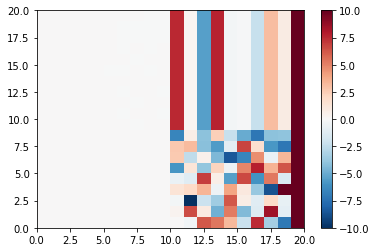

In [8]:
print("std EV variation(eigenvector*sqrt(eigenvalue))")
plt.pcolormesh(vl, cmap='RdBu_r', vmin=-10, vmax=10)
plt.colorbar()
plt.show()

print("restored EV variation(eigenvector*sqrt(eigenvalue))")
plt.pcolormesh(vl_norm, cmap='RdBu_r', vmin=-10, vmax=10)
plt.colorbar()
plt.show()
